In [0]:
import pandas as pd
import json
import csv
import os
import spacy
from textblob import TextBlob
from spacy import displacy
import seaborn as sns
# Load English tokenizer, tagger, parser, NER and word vectors


In [0]:
!pip install spacy

# Mounting Google Drive

In [2]:
# if on local jupyter skip this and the next cell.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = "gdrive/My Drive/Banksy/"

In [0]:
with open(path+"Hongkong_channel_messages.json") as jsonFile:
  data = [json.loads(i) for i in jsonFile]

In [0]:
data_clean = []
for d in data[0]:
  if 'message'in d:
    data_clean.append(d)

In [0]:
data = data_clean

In [7]:
data[:2]

[{'_': 'Message',
  'date': '2020-01-27T15:01:58+00:00',
  'edit_date': None,
  'edit_hide': False,
  'entities': [],
  'from_id': None,
  'from_scheduled': False,
  'fwd_from': None,
  'grouped_id': None,
  'id': 20274,
  'legacy': False,
  'media': None,
  'media_unread': False,
  'mentioned': False,
  'message': 'Live channel stops here today. Pls take care and continue to stand with Hong Kong',
  'out': False,
  'post': True,
  'post_author': None,
  'reply_markup': None,
  'reply_to_msg_id': None,
  'restriction_reason': [],
  'silent': True,
  'to_id': {'_': 'PeerChannel', 'channel_id': 1254853860},
  'via_bot_id': None,
  'views': 201},
 {'_': 'Message',
  'date': '2020-01-27T14:58:12+00:00',
  'edit_date': None,
  'edit_hide': False,
  'entities': [],
  'from_id': None,
  'from_scheduled': False,
  'fwd_from': None,
  'grouped_id': None,
  'id': 20273,
  'legacy': False,
  'media': None,
  'media_unread': False,
  'mentioned': False,
  'message': 'Po Lam District Councillor Fun

# Name Entity Extraction

In [0]:
nlp = spacy.load("en_core_web_sm")

In [0]:
doc = nlp(data[0]["message"])

In [11]:
# test for 10 entries
for msg in data[:10]:
  doc = nlp(msg["message"])
  displacy.render(doc, style="ent",jupyter=True)
  if len(doc.ents)>0:
    for ent in doc.ents:
        print(ent.text, " ---- " , ent.label_)
    print("-------------------------------------")

today  ----  DATE
Hong Kong  ----  GPE
-------------------------------------


Po Lam District  ----  PERSON
Fung Kwan  ----  PERSON
On  ----  GPE
-------------------------------------


#  ----  CARDINAL
MongKok  ----  ORG
2243  ----  DATE
10  ----  CARDINAL
Dung St  ----  PERSON
Wai Fung Centre  ----  FAC
-------------------------------------


MongKok  ----  ORG
2240  ----  DATE
20  ----  CARDINAL
MongKok  ----  PERSON
-------------------------------------


2216  ----  DATE
#UST #CUHK #HKBU #HKU  ----  MONEY
#EdUHK #LU  ----  MONEY
Caritas  ----  ORG
#CPCE #  ----  MONEY
17 Feb 2020  ----  DATE
3  ----  CARDINAL
17  ----  CARDINAL
#PolyU 
  ----  MONEY
17  ----  CARDINAL
10 to 16  ----  CARDINAL
#CityU 
  ----  MONEY
7  ----  CARDINAL
#HangSengUniversity #  ----  MONEY
17  ----  CARDINAL
3/F  ----  CARDINAL
-------------------------------------


MongKok  ----  ORG
At least 39  ----  CARDINAL
Mi Home  ----  ORG
-------------------------------------


#  ----  CARDINAL
TuenMun  ----  ORG
2138  ----  DATE
6  ----  CARDINAL
Siu Hong  ----  GPE
-------------------------------------


2138  ----  DATE
-------------------------------------


KowloonBay 
  ----  ORG
2  ----  CARDINAL
EU  ----  ORG
2  ----  CARDINAL
4  ----  CARDINAL
Richland Gardens  ----  LOC
-------------------------------------


2128  ----  DATE
#RoadCondition #  ----  MONEY
#深水埗
  ----  MONEY
Cheung Sha Wan Rd  ----  ORG
Mei Foo  ----  PERSON
Yen Chaw St  ----  PERSON
one  ----  CARDINAL
-------------------------------------


In [0]:
locations  = []
for msg in data[:3000]:
  doc = nlp(msg["message"])
  # displacy.render(doc, style="ent",jupyter=True)
  if len(doc.ents)>0:
    for ent in doc.ents:
        if ent.label_ == "GPE":
          locations.append(ent.text)

In [0]:
# with time
import datetime
locDate  = []
for msg in data[:3000]:
  doc = nlp(msg["message"])
  # displacy.render(doc, style="ent",jupyter=True)
  if len(doc.ents)>0:
    for ent in doc.ents:
      if (ent.text.encode('ascii', 'ignore').decode('ascii') !=''):
        if ent.label_ == "GPE":
          date_time_str = msg["date"].split('+')[0]
          date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%dT%H:%M:%S')
          locDate.append((date_time_obj.date(),ent.text.encode('ascii', 'ignore').decode('ascii')))
          # if date_time_obj.date() in locationsDict:
          #   locationsDict[date_time_obj.date()].append(ent.text)
          # else:
          #   locationsDict[date_time_obj.date()] = [ent.text]
          # if ent.text in locationsDict:
          #   locationsDict[ent.text].append(msg["date"].split('+')[0])
          # else:
          #   locationsDict[ent.text] = [msg["date"].split('+')[0]]

In [15]:
locDate[:5]

[(datetime.date(2020, 1, 27), 'Hong Kong'),
 (datetime.date(2020, 1, 27), 'On'),
 (datetime.date(2020, 1, 27), 'Siu Hong'),
 (datetime.date(2020, 1, 27), 'Taiwan'),
 (datetime.date(2020, 1, 27), 'HKSAR')]

In [16]:
from matplotlib import pyplot
df = pd.DataFrame(locDate)
df.head()


,0,1
0,2020-01-27,Hong Kong
1,2020-01-27,On
2,2020-01-27,Siu Hong
3,2020-01-27,Taiwan
4,2020-01-27,HKSAR


In [0]:
gk = df.groupby(1)
gk.first()

In [0]:
Counter(df[0])

Counter({'2019-12-08': 43,
         '2019-12-09': 1,
         '2019-12-10': 10,
         '2019-12-11': 1,
         '2019-12-14': 10,
         '2019-12-15': 62,
         '2019-12-17': 1,
         '2019-12-18': 1,
         '2019-12-20': 1,
         '2019-12-21': 46,
         '2019-12-22': 12,
         '2019-12-23': 1,
         '2019-12-24': 39,
         '2019-12-25': 13,
         '2019-12-26': 4,
         '2019-12-27': 2,
         '2019-12-28': 10,
         '2019-12-29': 23,
         '2019-12-31': 46,
         '2020-01-01': 55,
         '2020-01-04': 30,
         '2020-01-05': 42,
         '2020-01-11': 39,
         '2020-01-12': 9,
         '2020-01-14': 3,
         '2020-01-15': 1,
         '2020-01-18': 29,
         '2020-01-19': 57,
         '2020-01-20': 2,
         '2020-01-22': 2,
         '2020-01-25': 10,
         '2020-01-26': 58,
         '2020-01-27': 28})

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 10060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 10060 missing from current font.
  font.load_char(ord(s), flags=flags)


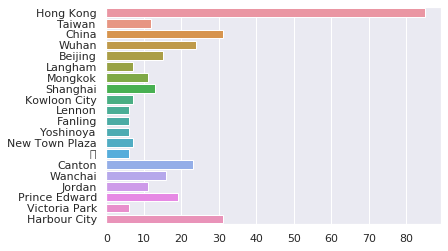

In [0]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

counts = Counter(locations)
counts = dict(counts).items()
counts = [i for i in counts if i[1] > 5]

sns.barplot(y=[i[0] for i in counts], x=[i[1] for i in counts])
plt.show()

In [0]:
counts

[('Hong Kong', 85),
 ('Taiwan', 12),
 ('China', 31),
 ('Wuhan', 24),
 ('Beijing', 15),
 ('Langham', 7),
 ('Mongkok', 11),
 ('Shanghai', 13),
 ('Kowloon City', 7),
 ('Lennon', 6),
 ('Fanling', 6),
 ('Yoshinoya', 6),
 ('New Town Plaza', 7),
 ('❌', 6),
 ('Canton', 23),
 ('Wanchai', 16),
 ('Jordan', 11),
 ('Prince Edward', 19),
 ('Victoria Park', 6),
 ('Harbour City', 31)]

# Topic Modeling

In [0]:
!pip install pyLDAVis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 21.3MB/s 
  Created wheel for pyLDAVis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=1796635af3c46ba2222600c85abc866ba8650c6618801f1e86816b36e770e2d5
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=f9e685018cf2de5bb9c018e9241a0f998710eb73393bafe31fe87f28dbec7201
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAVis funcy


In [17]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
# import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import nltk; nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use',"rt"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
df = pd.DataFrame(data)

In [19]:
df.head()

,_,id,to_id,date,message,out,mentioned,media_unread,silent,post,from_scheduled,legacy,edit_hide,from_id,fwd_from,via_bot_id,reply_to_msg_id,media,reply_markup,entities,views,edit_date,post_author,grouped_id,restriction_reason
0,Message,20274,"{'_': 'PeerChannel', 'channel_id': 1254853860}",2020-01-27T15:01:58+00:00,Live channel stops here today. Pls take care a...,False,False,False,True,True,False,False,False,None,None,None,NaN,None,None,[],201,None,None,NaN,[]
1,Message,20273,"{'_': 'PeerChannel', 'channel_id': 1254853860}",2020-01-27T14:58:12+00:00,Po Lam District Councillor Fung Kwan-On clarif...,False,False,False,True,True,False,False,False,None,None,None,20263.0,None,None,[],210,None,None,NaN,[]
2,Message,20272,"{'_': 'PeerChannel', 'channel_id': 1254853860}",2020-01-27T14:51:23+00:00,#MongKok \n2243 10 riot police walk towards Sh...,False,False,False,True,True,False,False,False,None,None,None,NaN,None,None,"[{'_': 'MessageEntityHashtag', 'offset': 0, 'l...",219,None,None,NaN,[]
3,Message,20271,"{'_': 'PeerChannel', 'channel_id': 1254853860}",2020-01-27T14:50:19+00:00,#MongKok \n2240 20 riot police with guns ente...,False,False,False,True,True,False,False,False,None,None,None,NaN,None,None,"[{'_': 'MessageEntityHashtag', 'offset': 0, 'l...",222,None,None,NaN,[]
4,Message,20270,"{'_': 'PeerChannel', 'channel_id': 1254853860}",2020-01-27T14:31:24+00:00,#UniversityClassSuspension\nlast updated: 27/1...,False,False,False,True,True,False,False,False,None,None,None,NaN,None,None,"[{'_': 'MessageEntityHashtag', 'offset': 0, 'l...",228,None,None,NaN,[]


In [20]:
# Convert to list
data = df.message.values.tolist()

data = [str(sent) for sent in data]

data = [sent.encode('ascii', 'ignore').decode('ascii') for sent in data]

# newlist = []
# for x in data:
#     newlist.append(x.replace('_', ''))

# data = newlist

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

#Remove empty Strings
data = list(filter(None, data))

pprint(data[:1])

['Live channel stops here today. Pls take care and continue to stand with Hong '
 'Kong']


In [21]:
data[:10]

['Live channel stops here today. Pls take care and continue to stand with Hong Kong',
 'Po Lam District Councillor Fung Kwan-On clarifies that these are still suspected cases.',
 '#MongKok 2243 10 riot police walk towards Shan Dung St from Wai Fung Centre',
 '#MongKok 2240 20 riot police with guns enter MongKok Rd from Nathan Rd',
 '#UniversityClassSuspension last updated: 27/1 2216 #UST #CUHK #HKBU #HKU #EdUHK #LU #HKCT #APA #ChuHai #TWC #Caritas #CPCE #HKUSPACE #CIE #VTC The above colleges and universities have announced that classes will start on 17 Feb 2020 #OpenU Classes via Internet from 3 Feb onwards Classes will start on 17 Feb #PolyU Classes will start on 17 Feb Classes via internet from 10 to 16 Feb #CityU Classes via internet from 7 Feb onwards until further notice #HangSengUniversity #ShueYan Classes will start at 17 Feb, and will be conducted via internet before that #HKUSPACE Masks available at 3/F enrolment center ',
 '2134 #MongKok At least 39 riot police outside Mi Hom

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:5])

[['live', 'channel', 'stops', 'here', 'today', 'pls', 'take', 'care', 'and', 'continue', 'to', 'stand', 'with', 'hong', 'kong'], ['po', 'lam', 'district', 'councillor', 'fung', 'kwan', 'on', 'clarifies', 'that', 'these', 'are', 'still', 'suspected', 'cases'], ['mongkok', 'riot', 'police', 'walk', 'towards', 'shan', 'dung', 'st', 'from', 'wai', 'fung', 'centre'], ['mongkok', 'riot', 'police', 'with', 'guns', 'enter', 'mongkok', 'rd', 'from', 'nathan', 'rd'], ['last', 'updated', 'ust', 'cuhk', 'hkbu', 'hku', 'eduhk', 'lu', 'hkct', 'apa', 'chuhai', 'twc', 'caritas', 'cpce', 'hkuspace', 'cie', 'vtc', 'the', 'above', 'colleges', 'and', 'universities', 'have', 'announced', 'that', 'classes', 'will', 'start', 'on', 'feb', 'openu', 'classes', 'via', 'internet', 'from', 'feb', 'onwards', 'classes', 'will', 'start', 'on', 'feb', 'polyu', 'classes', 'will', 'start', 'on', 'feb', 'classes', 'via', 'internet', 'from', 'to', 'feb', 'cityu', 'classes', 'via', 'internet', 'from', 'feb', 'onwards', 'un

In [23]:
len(data_words)

18345

In [24]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['po', 'lam', 'district', 'councillor', 'fung', 'kwan', 'on', 'clarifies', 'that', 'these', 'are', 'still', 'suspected', 'cases']


In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [26]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['live', 'channel', 'stop', 'today', 'take', 'care', 'continue', 'stand', 'hong', 'kong']]


In [27]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]]


In [0]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('care', 1),
  ('channel', 1),
  ('continue', 1),
  ('hong', 1),
  ('kong', 1),
  ('live', 1),
  ('stand', 1),
  ('stop', 1),
  ('take', 1),
  ('today', 1)]]

In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [29]:
from gensim.test.utils import datapath
# Save model to disk.
temp_file = datapath("banksy")
lda_model.save(temp_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [30]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.114*"mongkok" + 0.104*"causewaybay" + 0.092*"northpoint" + '
  '0.069*"junction" + 0.040*"shield" + 0.032*"sogo" + 0.029*"nathan" + '
  '0.026*"gun" + 0.024*"side" + 0.022*"rd"'),
 (1,
  '0.196*"close" + 0.069*"airport" + 0.031*"announce" + 0.025*"event" + '
  '0.024*"news" + 0.023*"rthk" + 0.018*"gate" + 0.018*"china" + '
  '0.017*"suspension" + 0.014*"amoyplaza"'),
 (2,
  '0.229*"bind" + 0.094*"west" + 0.072*"tong" + 0.069*"island" + '
  '0.035*"western" + 0.033*"lane" + 0.029*"tse" + 0.029*"north_point" + '
  '0.026*"north" + 0.024*"fu"'),
 (3,
  '0.238*"car" + 0.132*"https" + 0.049*"she" + 0.040*"prince_edward" + '
  '0.035*"secondary_school" + 0.033*"private" + 0.029*"alert" + 0.028*"yan" + '
  '0.023*"wongtaisin" + 0.023*"back"'),
 (4,
  '0.147*"tunnel" + 0.028*"tear_gas" + 0.028*"sun" + 0.028*"need" + '
  '0.026*"pacific_place" + 0.026*"eastern" + 0.024*"smooth" + 0.023*"pm" + '
  '0.022*"yellow" + 0.022*"free"'),
 (5,
  '0.094*"due" + 0.078*"district" + 0.065*"still" 

In [32]:
lda_model.top_topics(corpus)[:2]

[([(0.10498479, 'estate'),
   (0.10491685, 'wan'),
   (0.070282556, 'block'),
   (0.048772786, 'harbour'),
   (0.045520328, 'shatin'),
   (0.045176003, 'cross'),
   (0.033462793, 'chai'),
   (0.032545876, 'sheung'),
   (0.029591564, 'update'),
   (0.026572125, 'check'),
   (0.025482835, 'cheung'),
   (0.024809938, 'chung'),
   (0.024722956, 'sha'),
   (0.024329182, 'wo'),
   (0.018287836, 'wah'),
   (0.016896743, 'bound'),
   (0.016342157, 'ping'),
   (0.015029707, 'hang'),
   (0.014361221, 'charge'),
   (0.014146188, 'canal')],
  -3.7274795606729114),
 ([(0.17197749, 'stop'),
   (0.12036887, 'bus'),
   (0.11558983, 'route'),
   (0.07036576, 'omit'),
   (0.053679183, 'follow'),
   (0.04370857, 'temporary'),
   (0.029175058, 'suspend'),
   (0.02489849, 'kmb'),
   (0.022629373, 'island'),
   (0.019858336, 'terminus'),
   (0.01624973, 'change'),
   (0.016052537, 'setup'),
   (0.015741047, 'citybus'),
   (0.014936207, 'train'),
   (0.011858135, 'diversion'),
   (0.010144538, 'nwfb'),
   (0

In [0]:
df['Dates'] = pd.to_datetime(df['date']).dt.date
df['Time'] = pd.to_datetime(df['date']).dt.time

In [0]:
w = ['mongkok','causewaybay','northpoint']
f_df = df.loc[('mongkok'in sent for sent in df['message'])]

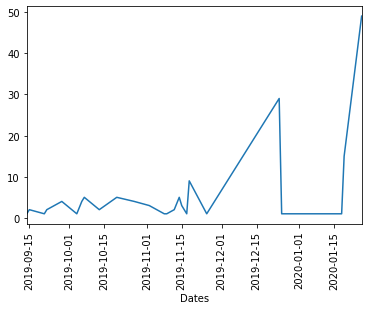

In [0]:
grouped = f_df.groupby('Dates').count()["message"]
grouped.plot.line(rot = 90)

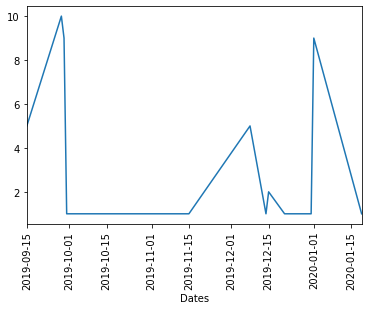

In [0]:
c_df = df.loc[('causewaybay'in sent for sent in df['message'])]
grouped2 = c_df.groupby('Dates').count()["message"]
grouped2.plot.line(rot = 90)

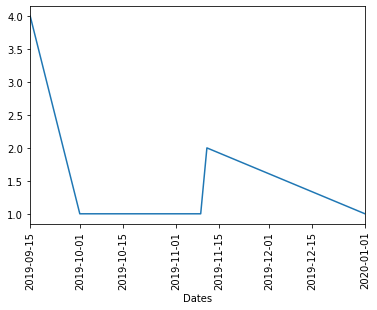

In [0]:
n_df = df.loc[('northpoint'in sent for sent in df['message'])]
grouped3 = n_df.groupby('Dates').count()["message"]
grouped3.plot.line(rot = 90)

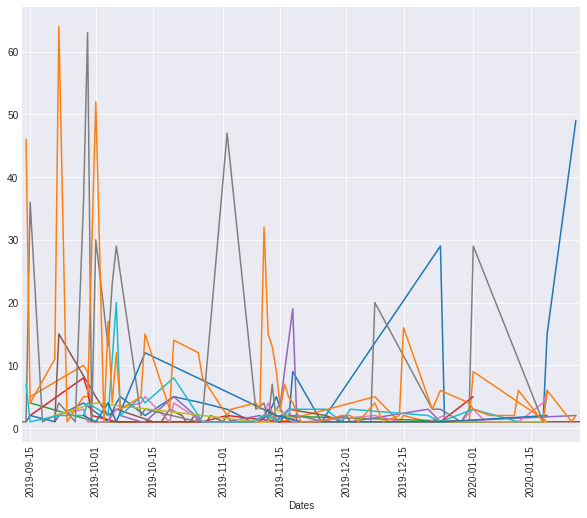

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')


locs = ['mongkok','causewaybay','northpoint','sogo','nathan', 'airport','tong', 'chai', 'tuen','kowloon', 'tsuen', 'wai']
num = 0

for loc in locs:

  temp = df.loc[(loc in sent for sent in df['message'])].groupby('Dates').count()["id"]

  temp.plot.line(rot = 90 ,figsize = (10,8))


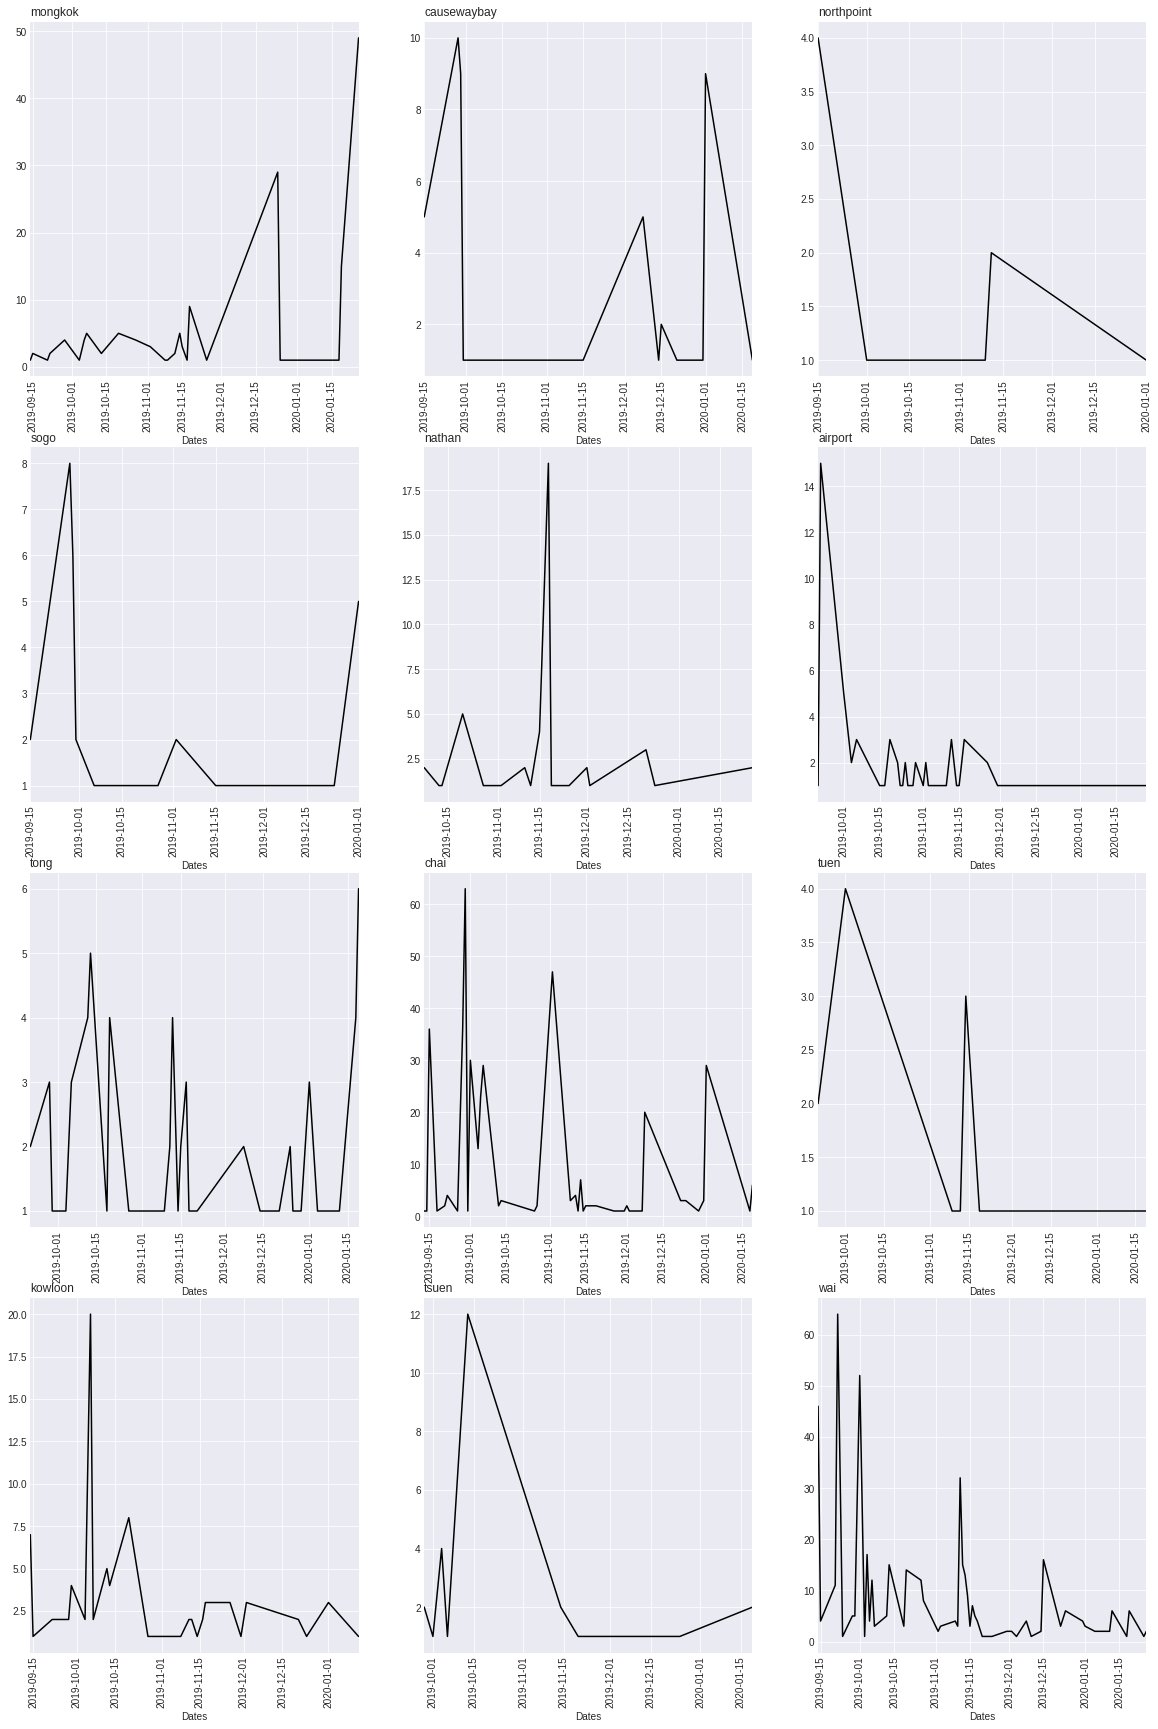

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')


locs = ['mongkok','causewaybay','northpoint','sogo','nathan', 'airport','tong', 'chai', 'tuen','kowloon', 'tsuen', 'wai']
num = 0

for loc in locs:
  num +=1
  plt.subplot(4,3, num)
  plt.style.use('seaborn-darkgrid')

  temp = df.loc[(loc in sent for sent in df['message'])].groupby('Dates').count()["id"]

  temp.plot.line(figsize = (20,30), style ='k', rot=90)
  plt.style.use('seaborn-darkgrid')
  plt.title(loc, loc='left', fontsize=12, fontweight=0 )

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.5MB/s 
     |████████████████████████████████| 552kB 35.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=dc6ce237e2f996679f83a8f65a022800c1f947a93e19b1e4c98971c6b15bdba0
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=a5a9fab90bdeea467b33d4c6c6a347607be8a28fa39b862ed6a1186832b7ebf2
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.117593  0.312596       1        1  11.663745
6      0.283460 -0.246280       2        1   9.463078
17     0.104023  0.011943       3        1   7.162624
11     0.143710  0.111066       4        1   6.291842
8      0.067746  0.106415       5        1   5.731009
2      0.150025 -0.179166       6        1   5.591336
13     0.049633  0.041365       7        1   5.490086
12     0.039199  0.063065       8        1   5.253428
9     -0.005750  0.017904       9        1   4.840617
0     -0.086496  0.013132      10        1   4.765207
19     0.043795  0.024404      11        1   4.757633
18    -0.141139 -0.050120      12        1   4.034343
16    -0.098564 -0.027367      13        1   3.590692
15    -0.062207  0.001847      14        1   3.561345
7     -0.133963 -0.028244      15        1   3.469241
4     -0.144543 -0.045584      16        1   3.416269
3     -0.059788  0.005664      17        1   3.001141
1     -0.113429 -0.037353      18        1   2.716621
5     -0.084579 -0.043325      19        1   2.637662
14    -0.068727 -0.051963      20        1   2.562089, topic_info=     Category         Freq      Term        Total  loglift  logprob
23    Default  8511.000000    police  8511.000000  30.0000  30.0000
82    Default  5698.000000      road  5698.000000  29.0000  29.0000
68    Default  3603.000000   station  3603.000000  28.0000  28.0000
7     Default  3323.000000      stop  3323.000000  27.0000  27.0000
69    Default  2616.000000      bind  2616.000000  26.0000  26.0000
...       ...          ...       ...          ...      ...      ...
1069  Topic20    26.791508     smoke    27.721010   3.6302  -5.2758
3729  Topic20    25.519030  umbrella    26.448515   3.6286  -5.3245
550   Topic20    24.426022       hei    25.355539   3.6270  -5.3683
6354  Topic20    23.771687       dot    24.705294   3.6258  -5.3954
1924  Topic20    21.362411   weather    22.291897   3.6218  -5.5023

[654 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2355     11  0.987319   aberdeen
1068     20  0.963718   accident
1184     18  0.980662     accord
3984      2  0.995929     adjust
2040     16  0.984448      admin
...     ...       ...        ...
3076      7  0.995382  yoho_mall
321      19  0.965254      young
599       9  0.999517       yuen
510       7  0.998454   yuenlong
5278      4  0.981138       yuet

[697 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 7, 18, 12, 9, 3, 14, 13, 10, 1, 20, 19, 17, 16, 8, 5, 4, 2, 6, 15])

In [0]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,16.0,0.4311,"hong, kong, kowloonbay, safe, live, take, stan...",Live channel stops here today. Pls take care a...
1,1,5.0,0.2676,"due, district, still, yau, yiu, temporarily, p...",Po Lam District Councillor Fung Kwan-On clarif...
2,2,13.0,0.2049,"wai, long, vehicle, go, yuenlong, leave, area,...",#MongKok 2243 10 riot police walk towards Shan...
3,3,0.0,0.2856,"mongkok, causewaybay, northpoint, junction, sh...",#MongKok 2240 20 riot police with guns enter M...
4,4,5.0,0.3545,"due, district, still, yau, yiu, temporarily, p...",#UniversityClassSuspension last updated: 27/1 ...
5,5,10.0,0.2184,"police, exit, riot, mtr, traffic, east, green,...",2134 #MongKok At least 39 riot police outside ...
6,6,11.0,0.2223,"station, tin, shui, tinshuiwai, rail, man, kin...",#TuenMun #MTR 2138 6-7 cops with black face ma...
7,7,10.0,0.1594,"police, exit, riot, mtr, traffic, east, green,...",2138 # 6-7 #
8,8,3.0,0.2052,"car, https, she, prince_edward, secondary_scho...",#KowloonBay 2132 2 EU 2 carriers 4 police priv...
9,9,17.0,0.3051,"estate, wan, block, harbour, shatin, cross, ch...",2128 #RoadCondition #ShamShuiPo # police road ...


In [0]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.5098,"mongkok, causewaybay, northpoint, junction, shield, sogo, nathan, gun, side, rd","0020 #mongkok Shantung St Nathan Rd junction - gun sounds heard, press said police shot guns aga..."
1,1.0,0.4697,"close, airport, announce, event, news, rthk, gate, china, suspension, amoyplaza",#news #wuhanpneumonia Custom between Mongolia and China closed to fight against Wuhan Pneumonia ...
2,2.0,0.3702,"bind, west, tong, island, western, lane, tse, north_point, north, fu",1645 #NWFB #Trafficinfo #Citybus 20 U turn at Argyle St CLP Tai Kok Tsui Bound omit Man Kee Mans...
3,3.0,0.4972,"car, https, she, prince_edward, secondary_school, private, alert, yan, wongtaisin, back",OLD CY8687 - DH423 - jazz EU2826 - JG8214 - corolla AE110 KC1220 - polo LB9182 - scirocco NC853...
4,4.0,0.5142,"tunnel, tear_gas, sun, need, pacific_place, eastern, smooth, pm, yellow, free",Major Road updates 2120 updated Hung Hom Tunnel: Smooth Safe Eastern Tunnel: SmoothSafe Western ...
5,5.0,0.3545,"due, district, still, yau, yiu, temporarily, passenger, start, lrt, detail",#UniversityClassSuspension last updated: 27/1 2216 #UST #CUHK #HKBU #HKU #EdUHK #LU #HKCT #APA #...
6,6.0,0.6348,"stop, bus, route, omit, follow, temporary, suspend, kmb, island, terminus","2243 #TrafficInfo #bus Due to road situation, the following public transport services have been ..."
7,7.0,0.4610,"people, direction, citizen, arrest, section, ptu, protester, hold, head, hit","BREAKING: Taiwan election Tsai Ing-wen wins second presidential term, beating Beijing-friendly r..."
8,8.0,0.4729,"road, street, amoy, move, situation, bridge, least, raptor, hennessy, yee","#office from transportation department 1457 Due to road situation, the following road sections o..."
9,9.0,0.3202,"yuen, plaza, park, centre, van, carrier, white, ferry, hunghom, mall",#TsimShaTsui 0045 Xiqu Centre - 10eu 10 personnel carriers park


In [0]:
five_top= sent_topics_sorteddf_mallet.sort_values(by=["Topic_Perc_Contrib"], ascending=False).head(5)
five_top

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
6,6.0,0.6348,"stop, bus, route, omit, follow, temporary, suspend, kmb, island, terminus","2243 #TrafficInfo #bus Due to road situation, the following public transport services have been ..."
18,18.0,0.5488,"anti, garden, government, condition, sept, new, staff, group, show, public",China extends holiday to buy time as virus spreads China on Monday extended its the Lunar New Ye...
10,10.0,0.5195,"police, exit, riot, mtr, traffic, east, green, princeedward, get, standby","#MTR 2203 Prince Edward Exit A 20 police 2205 ShamShuiPo Exit C, D 5 police 2205 Jordan exit AB ..."
4,4.0,0.5142,"tunnel, tear_gas, sun, need, pacific_place, eastern, smooth, pm, yellow, free",Major Road updates 2120 updated Hung Hom Tunnel: Smooth Safe Eastern Tunnel: SmoothSafe Western ...
0,0.0,0.5098,"mongkok, causewaybay, northpoint, junction, shield, sogo, nathan, gun, side, rd","0020 #mongkok Shantung St Nathan Rd junction - gun sounds heard, press said police shot guns aga..."


In [0]:
data_lemmatized[:5]

[['loooove'],
 ['mis', 'respeto', 'banksy', 'ere', 'el', 'mejor', 'artista', 'contemporneo'],
 ['well', 'warehouse', 'rent', 'art', 'collector', 'money', 'launderer'],
 ['shame', 'money', 'take', 'museum', 'instead', 'stay', 'mean'],
 ['know', 'place', 'shot', 'remove', 'carter', 's', 'kate', 'find']]

In [0]:
mostFreq = []
for l in data_lemmatized:
  for word in l:
    mostFreq.append(word)

In [34]:
mostFreq[:5]

['live', 'channel', 'stop', 'today', 'take']

In [0]:
from nltk.probability import FreqDist
fdist = FreqDist(word.lower() for word in mostFreq)

In [0]:
fdist.pop("banksy")

279

Removed banksy from words

<Figure size 432x288 with 0 Axes>

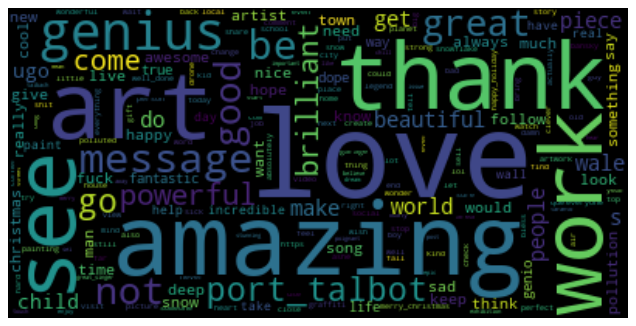

In [0]:
# d = {}
# for a, x in bag.values:
#     d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.pyplot import figure

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=fdist)
plt.figure()
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()